In [ ]:
#1. Capomulin and Ramicane both showed considerable reductions in final tumor volume. 
#2. As evidenced by mouse #b128, Capomulin appears to be an effective treatment for the tumors. Once again, we show a significant reduction in tumor volume.
#3. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# check shape of merged data
merged_data.shape

(1893, 8)

In [5]:
# Checking the number of mice with duplicate timepoints.
duplicate_mice = merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]).sum()
duplicate_mice

5

In [6]:
# display mouse id with duplicate timepoints
display_duplicate_mice = merged_data.loc[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]), :]
display_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.loc[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]), ['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.loc[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = merged_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])

In [10]:
# Checking the number of mice in the clean DataFrame.
no_duplicates.shape

(1888, 8)

In [11]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = no_duplicates.groupby('Drug Regimen').agg(
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
        Tumor_Vol_Std=('Tumor Volume (mm3)', np.std),
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)
).round(3)

summary_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Std,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


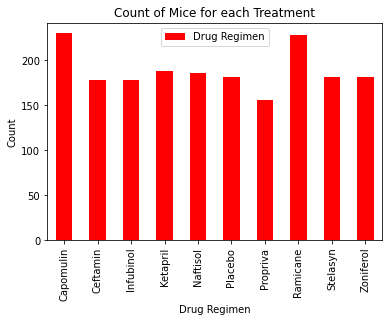

In [13]:

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = no_duplicates.groupby('Drug Regimen')
total_mice_count = pd.DataFrame(total_mice['Drug Regimen'].count())

# Create a dataframe counting the number of data points for each Drug Regimen
mice_bar = total_mice_count.plot(kind="bar", title="Count of Mice for each Treatment", color="red")

plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.show();

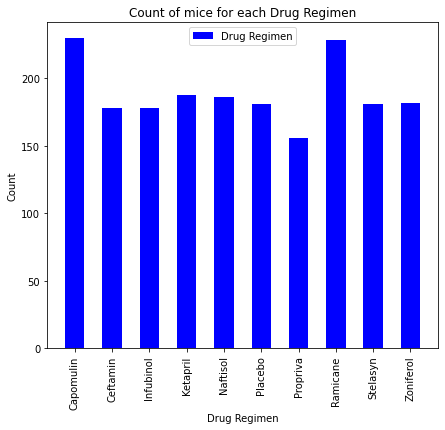

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(total_mice_count))
tick_locations = [value for value in x_axis]

# create chart
plt.figure(figsize=(7,6))
plt.bar(x_axis, total_mice_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(total_mice_count.index), rotation="vertical")

# Set a Title and labels
plt.title("Count of mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.show();

In [15]:
# count of mice by sex
gender_group = no_duplicates.groupby('Sex')
gender_count = pd.DataFrame(gender_group['Sex'].count())
gender_count.head()

,Sex
Sex,
Female,930
Male,958


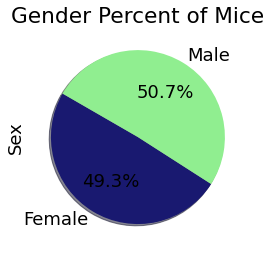

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_pie = gender_count.plot(kind="pie", y='Sex', title="Gender Percent of Mice", autopct='%1.1f%%', shadow=True, startangle= 150, 
                               fontsize=18, colors=["midnightblue", "lightgreen"], legend=False)

plt.show();

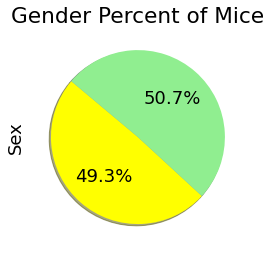

In [25]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
pie_sections = gender_count['Sex']

# The colors of each section of the pie chart
colors = ["yellow", "lightgreen"]

plt.pie(pie_sections, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 18
plt.title("Gender Percent of Mice")
plt.ylabel("Sex")
plt.show();

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Timepoint_max=merged_data.groupby(['Mouse ID'])['Timepoint'].max()
Timepoint_max.describe()

count    249.000000
mean      32.911647
std       15.465109
min        0.000000
25%       20.000000
50%       45.000000
75%       45.000000
max       45.000000
Name: Timepoint, dtype: float64

In [29]:

# Merge this group df with the original dataframe...

new_df = pd.merge(Timepoint_max, merged_data, how='left', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
new_df
new_df['Timepoint'].describe()

count    249.000000
mean      32.911647
std       15.465109
min        0.000000
25%       20.000000
50%       45.000000
75%       45.000000
max       45.000000
Name: Timepoint, dtype: float64

In [30]:

#tumor volume at the last timepoint
new_df['Tumor Volume (mm3)'].describe()

count    249.000000
mean      54.999137
std       12.655080
min       22.050126
25%       45.934712
50%       55.841410
75%       64.957562
max       78.567014
Name: Tumor Volume (mm3), dtype: float64

In [31]:

#rename column headers to make them easier to work with

new_df2=new_df.rename(columns={'Mouse ID':'ID', 'Timepoint':'Timepoint', 'Drug Regimen':'Drug', 'Sex':'Sex', 'Age_months':'Age',
       'Weight (g)':'Weight', 'Tumor Volume (mm3)':'Tumor', 'Metastatic Sites':'metastatic'})
new_df2

,ID,Timepoint,Drug,Sex,Age,Weight,Tumor,metastatic
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

drug_list=[]
tumor_vol=[]

#Locate the rows which contain mice on each drug and get the tumor volumes 

for row_num, i in enumerate(new_df2['Drug']):
    if i in treatment_list:
        drug_list.append(i)
        tumor_vol.append(new_df2['Tumor'][row_num])
        
drug_tumor=pd.DataFrame({"Drug Regimen": drug_list,
"Tumor Volume": tumor_vol})
drug_tumor

,Drug Regimen,Tumor Volume
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


In [33]:
#alternative strategy that doesn't require for loops
treatment_rows =new_df2[new_df2["Drug"].isin(treatment_list)]
treatment_rows

tumor_values = treatment_rows[["Drug", "Tumor"]]
tumor_values

,Drug,Tumor
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
239,Ceftamin,68.594745
240,Capomulin,31.896238
241,Ceftamin,64.729837
245,Ramicane,30.638696


In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_values['Tumor'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

outlier_tumor = tumor_values.loc[(tumor_values['Tumor'] < lower_bound) | (tumor_values['Tumor'] > upper_bound)]
outlier_tumor

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Drug,Tumor


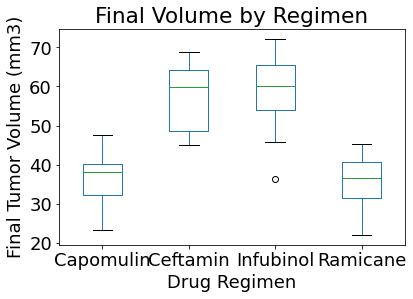

In [36]:
# Create the boxplot
boxplot = tumor_values.boxplot(column=['Tumor'], by='Drug',
                return_type =None)

boxplot.set_title('Final Volume by Regimen')
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('Drug Regimen')
boxplot.yaxis.grid(False)
boxplot.xaxis.grid(False)
plt.suptitle('')
plt.show()

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
capomulin

mouse=capomulin.loc[capomulin['Mouse ID'] == 'b128'] 
mouse
m_time=mouse['Timepoint']
m_time

300     0
301     5
302    10
303    15
304    20
305    25
306    30
307    35
308    40
309    45
Name: Timepoint, dtype: int64

In [40]:
m_tumor=mouse['Tumor Volume (mm3)']
m_tumor

300    45.000000
301    45.651331
302    43.270852
303    43.784893
304    42.731552
305    43.262145
306    40.605335
307    37.967644
308    38.379726
309    38.982878
Name: Tumor Volume (mm3), dtype: float64

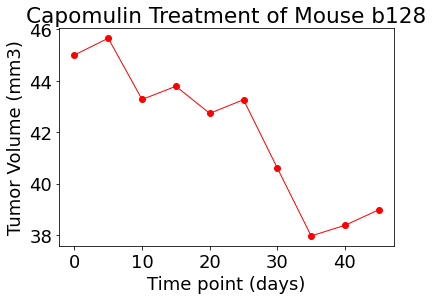

In [41]:
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Time point (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(m_time, m_tumor, marker="o", color="red", linewidth=1)
plt.show()

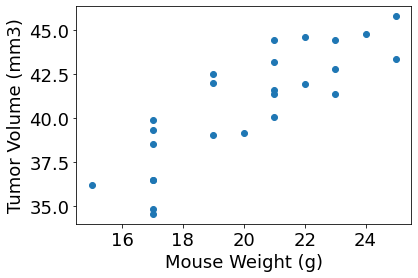

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_tumor_mean=capomulin.groupby('Mouse ID', as_index=True)['Tumor Volume (mm3)'].mean()
cap_weight_mean=capomulin.groupby('Mouse ID', as_index=True)['Weight (g)'].mean()

cap_tumor_mean
cap_weight_mean

cap_df=pd.DataFrame({"Tumor Volume (mm3)": cap_tumor_mean,
"Weight (g)": cap_weight_mean})
cap_df

plt.scatter(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


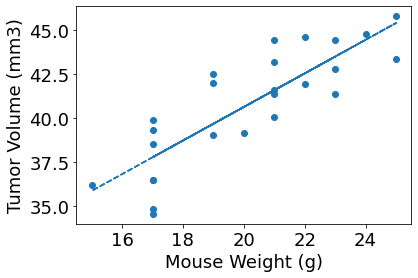

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(
    cap_df['Weight (g)'], cap_df['Tumor Volume (mm3)'])
m_fit = m_slope * cap_df['Weight (g)'] + m_int
plt.scatter(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
plt.plot(cap_df['Weight (g)'],m_fit,"--")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()